## introduction to NN classification using tensorflow

in this notebook we'll write Neural Networks for classification problems

a classifiction is where u try to classify something as one thing or another 

a few types:
* binary classification
* multiclass classification
* multilabel classification

## Creating data to view and fit

In [ ]:
from sklearn.datasets import make_circles

#make 1000 examples
n_samples = 1000

#create circles
x,y = make_circles(n_samples,
                   noise=0.03,
                   random_state=42)

In [ ]:
# check out features

x

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Our data is little hard to understand, lets visualize...

In [ ]:
import pandas as pd
circles = pd.DataFrame({"x0": x[:, 0], "x1":x[:,1], "label":y})
circles

,x0,x1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


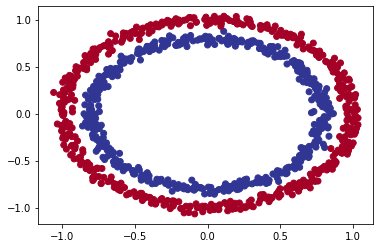

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.RdYlBu)

#Input and Output shapes

In [ ]:
# check the shapes of our features and labels
x.shape, y.shape

((1000, 2), (1000,))

In [ ]:
len(x), len(y)

(1000, 1000)

#Steps in modelling

1. create or import a model 
2. compile
3. fit
4. evaluate
5. tweak, evaluate...



In [ ]:
y.shape, y.ndim, x.shape, x.ndim

((1000,), 1, (1000, 2), 2)

In [ ]:
import tensorflow as tf
tf.random.set_seed(42)


#create 
model= tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#compile
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

model.fit(x,y, epochs=5)

Epoch 1/5
32/32 [==============================] - 4s 3ms/step - loss: 4.2979 - accuracy: 0.4670
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 4.2317 - accuracy: 0.4400
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 4.1610 - accuracy: 0.4310
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 4.1183 - accuracy: 0.4270
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 4.0784 - accuracy: 0.4240


In [ ]:
model.fit(x,y, epochs=200, verbose=0)
model.evaluate(x,y)

32/32 [==============================] - 1s 3ms/step - loss: 0.6932 - accuracy: 0.4930


[0.6932026743888855, 0.49300000071525574]

In [ ]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

model_2.fit(x,y, epochs=100, verbose=0)

In [ ]:
model_2.evaluate(x,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6933314800262451, 0.5]

#Improve the model!

lets look how to improve our model.

1. create a model- add more layers, increase the hidden units within a layer

2. compile- choose different optimizer

3. fitting- fit for more epochs

In [ ]:
tf.random.set_seed(42)

model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=(None, 1)),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               metrics=["accuracy"],
               optimizer="Adam")

model3.fit(x,y, epochs=100, verbose=0)

In [ ]:
model3.evaluate(x,y)

32/32 [==============================] - 0s 3ms/step - loss: 0.6939 - accuracy: 0.5000


[0.6939496994018555, 0.5]

In [ ]:
## create a function
# takes in a trained model, features(x) and labels, create a meshgrid of features(x),
#make predictions and plot them

import numpy as np

def plot_decision_boundary(model, x, y):
  """
  Plots the decision boundary created by a model predicting on x.
  """
  #define axis boundaries of plot and create meshgrid
  x_min, x_max = x[:, 0].min() - 0.1, x[:, 0].max() + 0.1
  y_min, y_max = x[:, 1].min() - 0.1, x[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  ## create x_values
  x_in = np.c_[xx.ravel(), yy.ravel()]  #stack 2d arrays together

  ## make preds
  y_pred = model.predict(x_in)

  #check for multiclass 
  if len(y_pred[0]) > 1:
    print("doing multiclass classification")
    #reshape predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)

  else:
    print("doing binary classification")
    y_pred = np.round_(y_pred).reshape(xx.shape)


  ##plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())




doing multiclass classification


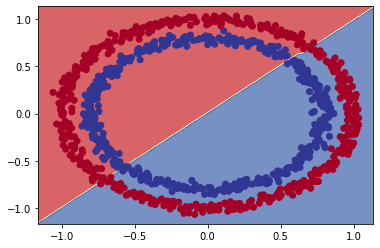

In [ ]:
#check out the predictions

plot_decision_boundary(model=model3, x=x, y=y)



Our data is making predictions for a regression problem.
lets fit our model with regression data and check for accuracy.

In [ ]:
tf.random.set_seed(42)

x_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5)

x_reg_train = x_regression[:150]
x_reg_test = x_regression[150:]

y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

model3.fit(tf.expand_dims(x_reg_train, axis=-1), y_reg_train, epochs=100)



Epoch 1/100
5/5 [==============================] - 0s 6ms/step - loss: -4016.8530 - accuracy: 0.0000e+00
Epoch 2/100
5/5 [==============================] - 0s 5ms/step - loss: -7145.1177 - accuracy: 0.0000e+00
Epoch 3/100
5/5 [==============================] - 0s 5ms/step - loss: -7154.2358 - accuracy: 0.0000e+00
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: -7190.0156 - accuracy: 0.0000e+00
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: -7190.0156 - accuracy: 0.0000e+00
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: -7190.0156 - accuracy: 0.0000e+00
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: -7190.0156 - accuracy: 0.0000e+00
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: -7190.0156 - accuracy: 0.0000e+00
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: -7190.0156 - accuracy: 0.0000e+00
Epoch 10/100
5/5 [==============================] - 0s 

In [ ]:
y_reg_train.shape, tf.expand_dims(y_reg_train, axis=-1).shape

(TensorShape([150]), TensorShape([150, 1]))

In [ ]:
tf.random.set_seed(42)


model_3= tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

model_3.fit(tf.expand_dims(x_reg_train, axis=-1), y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 5ms/step - loss: 248.2148 - mae: 248.2148
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 138.8992 - mae: 138.8992
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 53.1035 - mae: 53.1035
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 73.5183 - mae: 73.5183
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 71.2370 - mae: 71.2370
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 47.0045 - mae: 47.0045
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 45.9375 - mae: 45.9375
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 42.3635 - mae: 42.3635
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 43.6835 - mae: 43.6835
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 42.6201 - mae: 42.6201
Epoch 11/100
5/5 [==============================] - 0s 

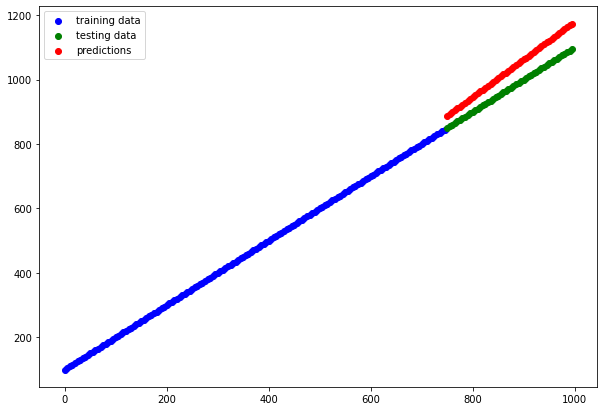

In [ ]:
y_reg_preds = model_3.predict(x_reg_test)

#plot
plt.figure(figsize=(10,7))
plt.scatter(x_reg_train, y_reg_train, c="b", label="training data")
plt.scatter(x_reg_test, y_reg_test, c="g", label="testing data")
plt.scatter(x_reg_test, y_reg_preds, c="r", label="predictions")
plt.legend();


## Non-linearity!


In [ ]:
tf.random.set_seed(42)

model4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

model.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(lr=0.001),
              metrics=["accuracy"])

history = model.fit(x, y, epochs=100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


32/32 [==============================] - 1s 6ms/step - loss: 0.6936 - accuracy: 0.5040
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6935 - accuracy: 0.5060
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.4880
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6934 - accuracy: 0.4660
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6934 - accuracy: 0.4510
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6935 - accuracy: 0.4870
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5040
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6934 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 6ms/step - loss: 0.6933 - accuracy: 0.5250
Epoch 10/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6934 - accuracy: 0.4660
Epoch 11/100
32/32 [=

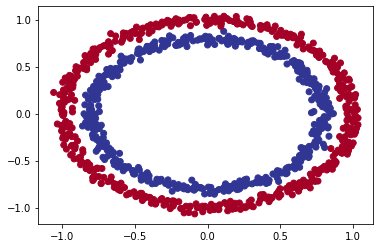

In [ ]:
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.RdYlBu)

doing binary classification


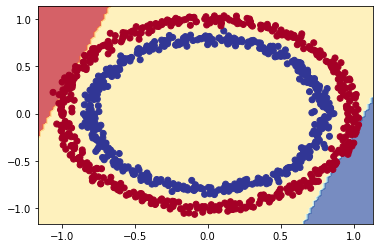

In [ ]:
plot_decision_boundary(model4, x, y)

In [ ]:
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu),

])

model_5.compile(loss="binary_crossentropy",
              metrics=["accuracy"],
              optimizer=tf.keras.optimizers.Adam(lr=0.001))

history = model_5.fit(x,y, epochs=100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


32/32 [==============================] - 1s 3ms/step - loss: 4.2979 - accuracy: 0.4670
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2317 - accuracy: 0.4400
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 4.1610 - accuracy: 0.4310
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1183 - accuracy: 0.4270
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 4.0784 - accuracy: 0.4240
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 3.9575 - accuracy: 0.4170
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 3.8372 - accuracy: 0.4090
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 3.7656 - accuracy: 0.4120
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 3.7378 - accuracy: 0.4170
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 3.6978 - accuracy: 0.4190
Epoch 11/100
32/32 [=

In [ ]:
tf.random.set_seed(42)


model6= tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model6.compile(loss="binary_crossentropy",
              metrics=["accuracy"],
              optimizer=tf.keras.optimizers.Adam(lr=0.01))

model6.fit(x, y, epochs=20)


Epoch 1/20


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


32/32 [==============================] - 1s 5ms/step - loss: 0.6834 - accuracy: 0.5550
Epoch 2/20
32/32 [==============================] - 0s 4ms/step - loss: 0.6761 - accuracy: 0.5630
Epoch 3/20
32/32 [==============================] - 0s 4ms/step - loss: 0.6700 - accuracy: 0.5600
Epoch 4/20
32/32 [==============================] - 0s 4ms/step - loss: 0.6615 - accuracy: 0.5960
Epoch 5/20
32/32 [==============================] - 0s 4ms/step - loss: 0.6553 - accuracy: 0.5850
Epoch 6/20
32/32 [==============================] - 0s 4ms/step - loss: 0.6386 - accuracy: 0.6360
Epoch 7/20
32/32 [==============================] - 0s 4ms/step - loss: 0.6150 - accuracy: 0.6890
Epoch 8/20
32/32 [==============================] - 0s 5ms/step - loss: 0.5641 - accuracy: 0.7480
Epoch 9/20
32/32 [==============================] - 0s 4ms/step - loss: 0.5101 - accuracy: 0.8090
Epoch 10/20
32/32 [==============================] - 0s 4ms/step - loss: 0.4451 - accuracy: 0.8550
Epoch 11/20
32/32 [===========

doing binary classification


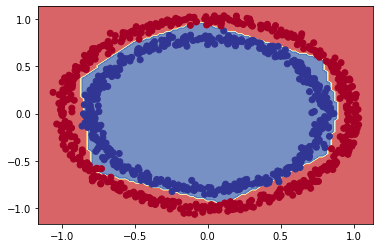

In [ ]:
# how do our model6 predictions look like

plot_decision_boundary(model6, x, y)

In [ ]:
model6.evaluate(x,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.1353 - accuracy: 0.9810


[0.13530556857585907, 0.9810000061988831]

fitting and testing model6 on different data

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [ ]:
model7= tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model7.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(lr=0.01),
               metrics=["accuracy"])

history = model7.fit(x_train, y_train, epochs=25)

Epoch 1/25


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


25/25 [==============================] - 3s 2ms/step - loss: 0.6897 - accuracy: 0.5200
Epoch 2/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6835 - accuracy: 0.5450
Epoch 3/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6760 - accuracy: 0.5675
Epoch 4/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6678 - accuracy: 0.5713
Epoch 5/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6562 - accuracy: 0.6200
Epoch 6/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6421 - accuracy: 0.6325
Epoch 7/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6176 - accuracy: 0.6812
Epoch 8/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5923 - accuracy: 0.7362
Epoch 9/25
25/25 [==============================] - 0s 3ms/step - loss: 0.5605 - accuracy: 0.7625
Epoch 10/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5248 - accuracy: 0.7750
Epoch 11/25
25/25 [===========

In [ ]:
model7.evaluate(x_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.1668 - accuracy: 0.9700


[0.16675405204296112, 0.9700000286102295]

doing binary classification


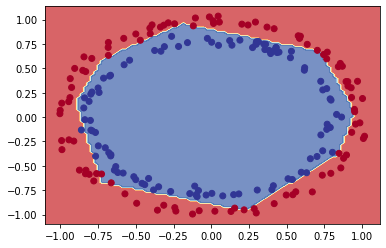

In [ ]:
plot_decision_boundary(model7, x_test,y_test)

Combination of linear and non-linear lines is one of the key fundamentals of neural network.

In [ ]:
## create a toy tensor

a = tf.cast(tf.range(-10,10), tf.float32)

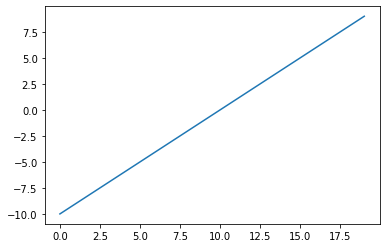

In [ ]:
plt.plot(a);

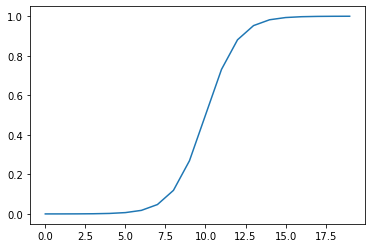

In [ ]:
# replicating sigmoid function - sigmoid(x) = 1/(1+ exp^(-x))

def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

plt.plot(sigmoid(a))

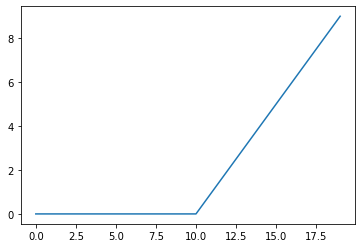

In [ ]:
def relu(x):
  return tf.maximum(0, x)

plt.plot(relu(a))

In [ ]:
relu(a)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

In [ ]:
tf.keras.activations.linear(a)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

linear activation returns the tensor unmodified😵‍💫

##Evaluating and improving our classification model


In [ ]:
# splittin using indexes

xtrain, ytrain = x[:800], y[:800]
ytest, xtest = y[800:], x[800:]

#splitting using sklearn.model_selection import train_test_split

# did that already

In [ ]:
model7.summary(
    
)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 4)                 12        
                                                                 
 dense_15 (Dense)            (None, 4)                 20        
                                                                 
 dense_16 (Dense)            (None, 1)                 5         
                                                                 
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


doing binary classification
doing binary classification


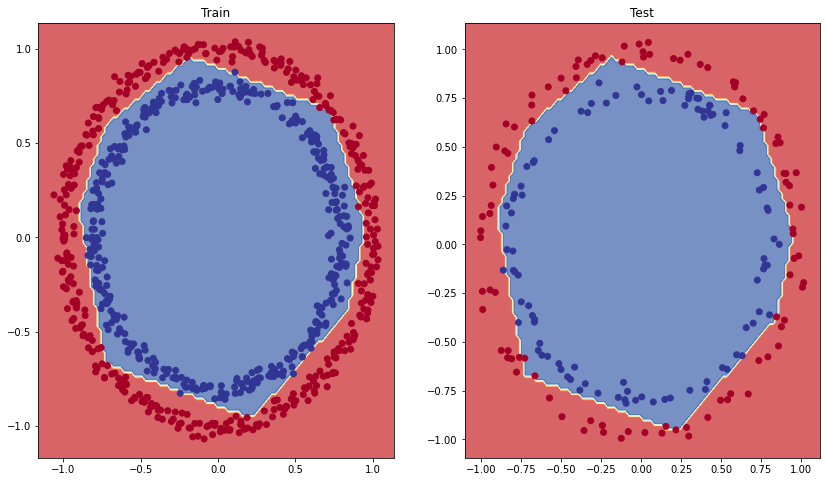

In [ ]:
#plotting the decision boundaries of test and train data 

plt.figure(figsize=(14,8))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model7, x_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model7, x_test, y_test)
plt.show();


In [ ]:
history.history

{'accuracy': [0.4987500011920929,
  0.5325000286102295,
  0.581250011920929,
  0.6875,
  0.6162499785423279,
  0.7537500262260437,
  0.7712500095367432,
  0.7662500143051147,
  0.8349999785423279,
  0.8162500262260437,
  0.8949999809265137,
  0.8987500071525574,
  0.918749988079071,
  0.9337499737739563,
  0.9437500238418579,
  0.9612500071525574,
  0.9649999737739563,
  0.9700000286102295,
  0.9712499976158142,
  0.9887499809265137,
  0.9624999761581421,
  0.9800000190734863,
  0.9837499856948853,
  0.987500011920929,
  0.9900000095367432],
 'loss': [0.6912946105003357,
  0.6832419633865356,
  0.6734030246734619,
  0.6567402482032776,
  0.6412719488143921,
  0.5990379452705383,
  0.5589998364448547,
  0.5202062726020813,
  0.47195079922676086,
  0.45217227935791016,
  0.39412713050842285,
  0.3596983253955841,
  0.3303733766078949,
  0.2978067100048065,
  0.2766760289669037,
  0.24650739133358002,
  0.22761744260787964,
  0.20192699134349823,
  0.19292116165161133,
  0.168682277202606

In [ ]:
 model7_history = pd.DataFrame(history.history)

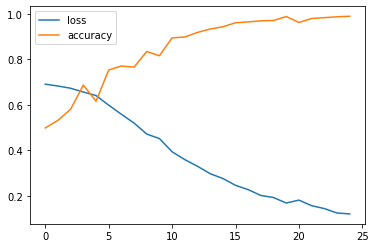

In [ ]:
model7_history.plot()

#📝- Finding the best LR

* a learning rate **callback** - it is an extra oiece of functionality, we can add to our model **while** it is training. 

* another model
* modified loss curves plot


In [ ]:
tf.random.set_seed(42)

model9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model9.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

## Create a LR callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

## Fit the model(Pass LR Scheduler)
history9 = model9.fit(x_train,
                     y_train,
                     epochs=100,
                     callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6917 - accuracy: 0.5000 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6910 - accuracy: 0.4988 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6903 - accuracy: 0.4975 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6897 - accuracy: 0.5075 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6888 - accuracy: 0.5063 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6881 - accuracy: 0.5075 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6873 - accuracy: 0.5050 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6864 - accuracy: 0.5088 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

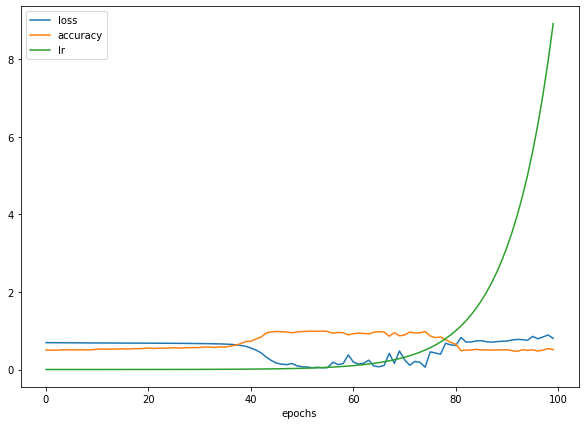

In [ ]:
##Checkout history
pd.DataFrame(history9.history).plot(figsize=(10,7), xlabel="epochs")

''

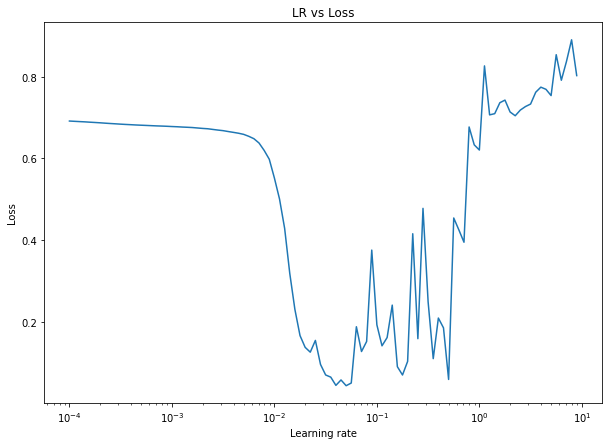

In [ ]:
## plot the lr vs loss

lrs = 1e-4 * (10**(tf.range(100)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs, history9.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("LR vs Loss")
;

In [ ]:
tf.random.set_seed(42)

model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])


model_10.compile(loss="binary_crossentropy",
                 metrics=["accuracy"],
                 optimizer=tf.keras.optimizers.Adam(lr=0.02))

history10 = model_10.fit(xtrain, ytrain, epochs=20)

Epoch 1/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6837 - accuracy: 0.5600
Epoch 2/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6744 - accuracy: 0.5750
Epoch 3/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6626 - accuracy: 0.5875
Epoch 4/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6332 - accuracy: 0.6388
Epoch 5/20
25/25 [==============================] - 0s 2ms/step - loss: 0.5830 - accuracy: 0.7563
Epoch 6/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4907 - accuracy: 0.8313
Epoch 7/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4251 - accuracy: 0.8450
Epoch 8/20
25/25 [==============================] - 0s 2ms/step - loss: 0.3596 - accuracy: 0.8875
Epoch 9/20
25/25 [==============================] - 0s 2ms/step - loss: 0.3152 - accuracy: 0.9100
Epoch 10/20
25/25 [==============================] - 0s 2ms/step - loss: 0.2512 - accuracy: 0.9500
Epoch 11/20
25/25 [

In [ ]:
 model_10.evaluate(x_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0909 - accuracy: 0.9850


[0.09085201472043991, 0.9850000143051147]

In [ ]:
model7.evaluate(x_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.1668 - accuracy: 0.9700


[0.16675405204296112, 0.9700000286102295]

doing binary classification
doing binary classification


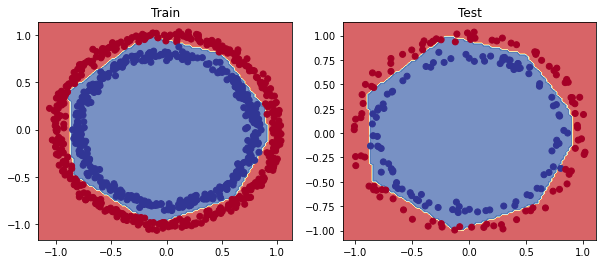

In [ ]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_10, x_train, y_train)

plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_10, x_test, y_test)

##More classification evaluating methods

* Accuracy 
* Precision
* F1 Score
* Confusion matrix
* Recall
* Classification Report from sklearn


In [ ]:
#chck accuracy of our model

loss, accuracy = model_10.evaluate(x_test, y_test)
print(f"Model loss on test set: {loss}")
print(f"Model accuracy on test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 3ms/step - loss: 0.0909 - accuracy: 0.9850
Model loss on test set: 0.09085201472043991
Model accuracy on test set: 98.50%


#How about confusion matrix

In [ ]:
#Create confusion atrix 

from sklearn.metrics import confusion_matrix

#make predictions
y_preds = model_10.predict(x_test)

#Create confusion matrix
confusion_matrix(y_test, ypreds)

array([[98,  2],
       [ 1, 99]])

looks like our predictions has come out in **prediction probability** form... the standard output from sigmoid/softmax activation functions.

In [ ]:
#Convert our prediction probabilities to binary format 
ypreds = tf.round(y_preds)

In [ ]:
import itertools
figsize = (10,10)

#Create confusion matrix
cm = confusion_matrix(y_test, ypreds)
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] #normalize our confusion matrix

n_classes = cm.shape[0]


#lets prettify it

fig, ax = plt.subplots(figsize=figsize)

#create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)


fig.colorbar(cax)

#Create classes

classes = False

if classes:
  labels=classes
else:
  labels = np.arange(cm.shape[0])


#label the axes
ax.set(title="Confusion matrix",
       xlabel="predicted label",
       ylabel="true label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)
  

#Set xAxis labels to bottom 
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()


#Adjust label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)


#set the threshold for the colors

threshold = (cm.max() + cm.min()) / 2.

#plot text
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i,j]}  ({cm_norm[i,j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i,j] > threshold else "black",
             size=15)

NameError: ignored

##Multiclass classification

Working with a larger example

When you have more than two classes as an option for classification, its known as **multiclass-classification**

* this means if uhave 100 different classes, its multiclass classification.


to practice multiclass classification, we'll build a NN to classify  different items of clothing.

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# data is already sorted into train and test sets
(train_data, train_labels), (test_data, test_label) = fashion_mnist.load_data()

In [ ]:
#first training sample

print(f"training sample :\n{train_data[0]}\n")
print(f"training label :\n{train_labels[0]}\n")




training sample :
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1 

In [ ]:
train_data[0].shape, train_labels[0].shape

((28, 28), ())

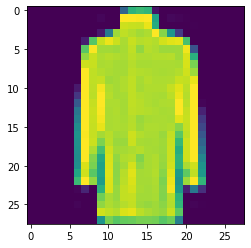

In [ ]:
# plot a single sample

import matplotlib.pyplot as plt

plt.imshow(train_data[75])

In [ ]:
# create a small list so we can index on our labels 

class_names = ["tshirt/top", "trouser", "pullover", "dress", "coat", "sandal", "shirt", "sneaker", "bag", "ankleboot"]

Text(0.5, 1.0, 'coat')

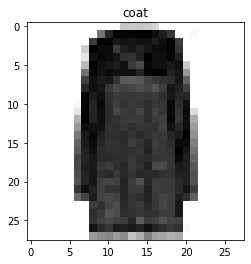

In [ ]:
index = 9121

plt.imshow(train_data[index], cmap= plt.cm.binary)
plt.title(class_names[train_labels[index]])

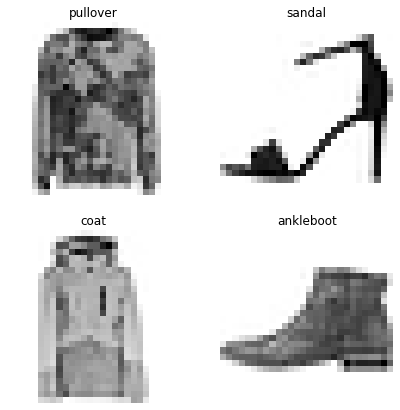

In [ ]:
## plot multiple random images 

import random

plt.figure(figsize=(7,7))

for i in range(4):
  ax = plt.subplot(2,2,i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

## Building a multiclass classification models

for our model, we can use a similar architecture to our binary classifiers by tweaking a few things:

* input shape = (28, 28)
* output shape = 10 (one per class of clothing)
* loss function = "categorical_crossentropy" (when labels are one-hot encoded),
"SparseCategoricalCrossentropy" (when labels are not one-hot encoded and in int form)
* output layer activation = softmax

In [ ]:
tf.random.set_seed(42)


#create model
mc_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")

])


mc_model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer="Adam",
                 metrics=["accuracy"])

non_norm_history = mc_model.fit(train_data,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data, test_label))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.1799 - accuracy: 0.1597 - val_loss: 1.8017 - val_accuracy: 0.2015
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.7090 - accuracy: 0.2494 - val_loss: 1.6514 - val_accuracy: 0.2945
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6367 - accuracy: 0.2860 - val_loss: 1.6065 - val_accuracy: 0.2788
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.6103 - accuracy: 0.2925 - val_loss: 1.6002 - val_accuracy: 0.3065
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.5932 - accuracy: 0.3058 - val_loss: 1.5831 - val_accuracy: 0.3228
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.5887 - accuracy: 0.3109 - val_loss: 1.5775 - val_accuracy: 0.2965
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5750 - accuracy: 0.3196 - val_loss: 1.5609 - val_accuracy:

In [ ]:
mc_model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_32 (Dense)            (None, 4)                 3140      
                                                                 
 dense_33 (Dense)            (None, 4)                 20        
                                                                 
 dense_34 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# chck min and max values of training data
train_data.min(), train_data.max()

(0, 255)

NN prefer data to be scaled(or normalized), this means they like to have the numbers in the tensors they try to find patterns in between 0 & 1.

In [ ]:
# we can get our train and test data bw 0&1 by ÷ by maximum

train_norm = train_data / 255.0
test_norm = test_data / 255.0

train_norm.max(), train_norm.min()

(1.0, 0.0)

In [ ]:
#data is normalized

tf.random.set_seed(42)

model11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer="Adam",
                metrics=["accuracy"])

norm_history = model11.fit(train_norm, train_labels,
            epochs=5,
            validation_data=(test_norm, test_label))

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881


neural networks tend to prefer  data in numerical form as well as scaled/normalized(between 0&1)😵‍💫

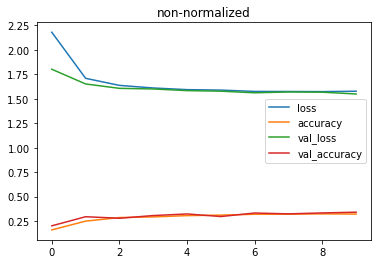

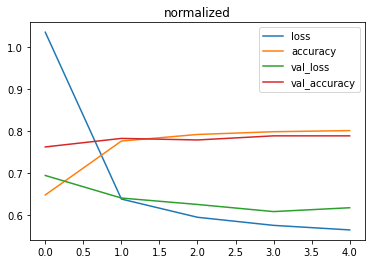

In [ ]:
import pandas as pd

pd.DataFrame(non_norm_history.history).plot(title="non-normalized")

pd.DataFrame(norm_history.history).plot(title="normalized")


same model with even *slightly* different data, produce *dramatically* different results.

#Finding ideal learning rate

In [ ]:
tf.random.set_seed(42)

model12= tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                metrics=["accuracy"],
                optimizer=tf.keras.optimizers.Adam())

#create lr callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))


model12.fit(train_norm,
            train_labels,
            epochs=40, 
            validation_data=(test_norm, test_label),
            callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 7s 3ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6366 - accuracy: 0.7759 - val_loss: 0.6400 - val_accuracy: 0.7808 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5934 - accuracy: 0.7911 - val_loss: 0.6278 - val_accuracy: 0.7770 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5749 - accuracy: 0.7969 - val_loss: 0.6122 - val_accuracy: 0.7871 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5655 - accuracy: 0.7987 - val_loss: 0.6061 - val_accuracy: 0.7913 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5569 - accuracy: 0.8022 - val_loss: 0.5917 - val_accuracy: 0.7940 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 7s

Text(0.5, 1.0, 'Finding Ideal LR')

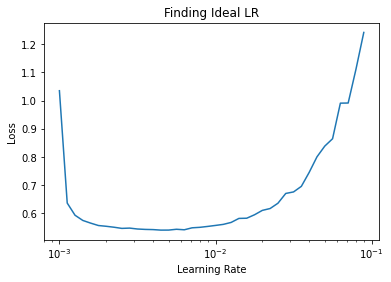

In [ ]:
## plot LR decay curve

import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, model12.history.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Finding Ideal LR")



#Evaluating our milti class classification model:

* evaluate its performance using other classification metrics (like confusion matrix)
* asses some of its predictions (by visualizing)
* improve its result by training for longer or changing its architecture
* save and export it for use in an application.


#lets go through the top2


In [ ]:
import itertools
from sklearn.metrics import confusion_matrix


figsize = (10,10)

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10,10), text_size=15):

  #Create confusion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] #normalize our confusion matrix

  n_classes = cm.shape[0]


  #lets prettify it

  fig, ax = plt.subplots(figsize=figsize)

  #create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)


  fig.colorbar(cax)

  #Create classes
  if classes:
    labels=classes
  else:
    labels = np.arange(cm.shape[0])


  #label the axes
  ax.set(title="Confusion matrix",
        xlabel="predicted label",
        ylabel="true label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)
    

  #Set xAxis labels to bottom 
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()


  #Adjust label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)


  #set the threshold for the colors

  threshold = (cm.max() + cm.min()) / 2.

  #plot text
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, f"{cm[i,j]}  ({cm_norm[i,j]*100:.1f}%)",
              horizontalalignment="center",
              color="white" if cm[i,j] > threshold else "black",
              size=text_size)

In [ ]:
class_names

['tshirt/top',
 'trouser',
 'pullover',
 'dress',
 'coat',
 'sandal',
 'shirt',
 'sneaker',
 'bag',
 'ankleboot']

In [ ]:
y